### Ridge Regression

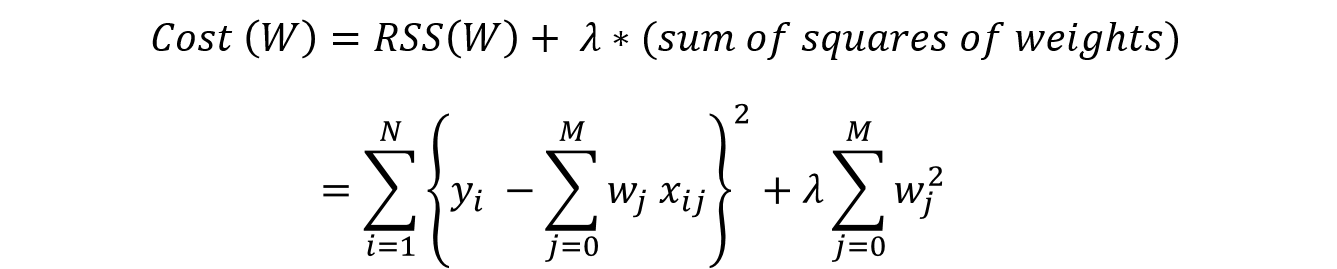

In [30]:
from IPython.display import Image
Image("C://Users//RJ//Desktop//ridge.png")

Minimization objective = LS Obj + $\alpha$ * (sum of square of coefficients).

*_$\alpha$ = $\lambda$ as stated in the above formula_*

Ridge Regression performs L2 regularization i.e. adds penalty equivalent to square of the magnitude of coefficient.
Minimization objective = LS Obj + $\alpha$ * (sum of square of coefficients).
NOTE: Here 'LS Obj' is Least Square Objective i.e. the linear regression objective without regularization.

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$


Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:
<br>

$\alpha$ = 0 :
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
<br> $\alpha$ = $infinite$ :
The coefficients will be zero because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
<br> 0 < $\alpha$ < $infinite$ :
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.
As the value of $\alpha$ increases, the model complexity decreases.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
# The sklearn.preprocessing package provides several common utility functions 
# and transformer classes to change raw feature vectors into a representation
# that is more suitable for the downstream estimators.

In [6]:
# slearn preprocessing

# Gaussian Zero Mean and Unit Variance

# For instance, many elements used in the objective function of a learning
# algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2
# regularizers of linear models) assume that all features are centered around
# zero and have variance in the same order. If a feature has a variance that is 
# orders of magnitude larger than others, it might dominate the objective function 
# and make the estimator unable to learn from other features correctly as expected.

from sklearn import preprocessing
import numpy as np
Xs_train = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]])

In [9]:
# scaled data will have zero mean and unit variance
Xs_scaled = preprocessing.scale(Xs_train)

In [10]:
Xs_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [12]:
Xs_scaled.mean(axis = 0)
# Zero Mean

array([0., 0., 0.])

In [14]:
Xs_scaled.std(axis=0)
# Unit Variance

array([1., 1., 1.])

In [1]:
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data) #often performed in L1 and L2 regressions
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10) #train_size automatically the complement of test_size.

# If int, random_state is the seed used by the random number generator; If RandomState instance,
# random_state is the random number generator; If None, the random number generator is the RandomState
# instance used by np.random.


In [3]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()


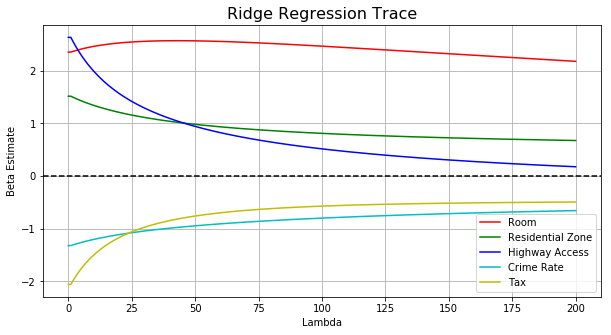

In [27]:

# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)